In [110]:
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.patches as patches


In [316]:
# G 3-turn helix (3_10 helix)
# H 4-turn helix (alpha-helix)
# I 5-turn helix (pi helix)

# E extended strand in parallel and/or anti-parallel β-sheet conformation. Min length 2 residues
# B residue in isolated β-bridge (single pair β-sheet hydrogen bond formation)

# P Polyproline

# T H-bonded turn
# S bend

# - coil -- ignore

In [317]:
# HELPER FUNCTIONS:
def plot_rectangle(start, end, color, box_height, ax, y = 0, alpha = 0.7):
    if start != end:
        rectangle = patches.Rectangle((start, y), width=end - start, height=box_height, linewidth=1, edgecolor='none', facecolor=color, alpha=alpha)
        ax.add_patch(rectangle)
    else:
        ax.axvline(start, lw = 1, alpha = alpha, color = color)

def return_intervals(a):
    a = sorted(set(a))
    b = []
    for k, g in itertools.groupby(enumerate(a), 
        key=lambda t: t[1] - t[0]):
        g = list(g)
        b.append([g[0][1], g[-1][1]]) 
    
    return b

In [322]:
def plot_af_domains(gene, ax):
    p = PDBParser()
    structure = p.get_structure(gene, "../data/TF_vis_AF/" + gene + ".pdb")
    model = structure[0]
    dssp = DSSP(model, "../data/TF_vis_AF/" + gene + ".pdb")

    pos = []
    code = []
    
    for i in range(len(list(dssp.keys()))):
        pos.append(i)
        a_key = list(dssp.keys())[i]
        code.append(dssp[a_key][2])

    codes = pd.DataFrame({"pos" : pos, "code" : code})
    

    color_palette = {# Helices
                    "G" : sns.color_palette('Blues')[-1],
                    "H" : sns.color_palette('Blues')[-1],
                    "I" : sns.color_palette('Blues')[-1],
    
                    # Sheets
                    "E" : sns.color_palette('Greens')[-1],
                    "B" : sns.color_palette('Greens')[-1],
    
                    # Poly proline helix
                    "P" : sns.color_palette('Reds')[-1],
    
                    # Other
                    "T" : "white",
                    "S" : "white",
                    "-" : "white"}
    
    codes["y"] = np.ones(len(codes))
    
    for code in set(codes["code"]):
        intervals =  return_intervals(codes[codes["code"] == code]["pos"])
        for s, e in intervals:
            #print(i)
            color = color_palette[code]
            plot_rectangle(s, e, color, 1, ax)
            ax.set_xlim(1, len(pos))       
    i+=1

    sns.despine()
    ax.set_yticks([])
    ax.set_yticklabels([])

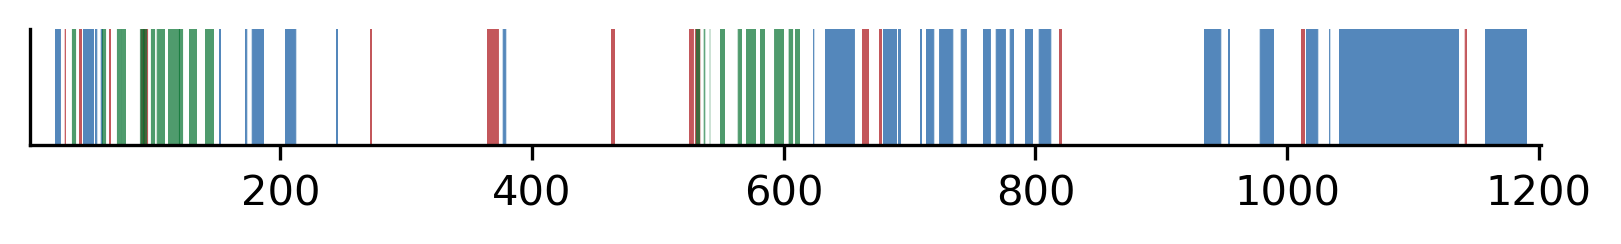

In [323]:
fig, ax = plt.subplots(figsize=(6.5,0.5), dpi = 300)
plot_af_domains("CAMTA2", ax = ax)

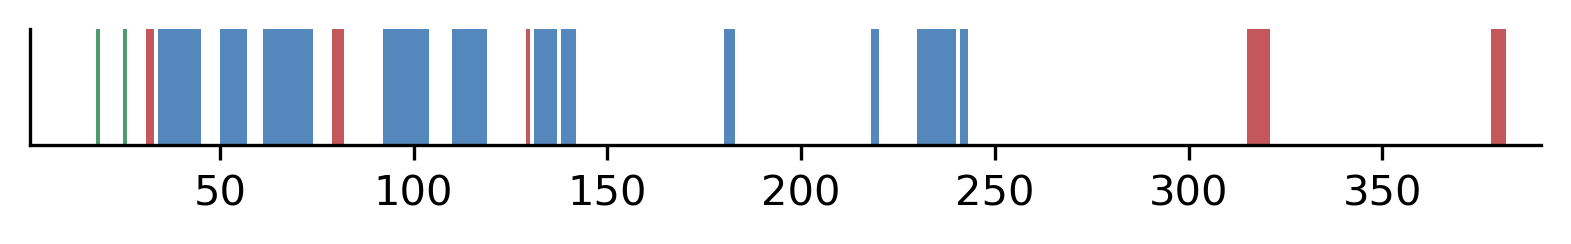

In [324]:
fig, ax = plt.subplots(figsize=(6.5,0.5), dpi = 300)
plot_af_domains("PAX5", ax = ax)